In [15]:
from aCAT import Predispatch, Dispatch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection
from datetime import datetime, timedelta
from helperFunctions import convert_to_datetime



In [16]:
sns.set_style("whitegrid")

#Color palatte
blue, red = sns.color_palette("muted", 2)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)


In [17]:
predispatch = Predispatch()
predispatch_region_sum = predispatch.get_table("REGION_SOLUTION")
predispatch_region_price = predispatch.get_table("REGION_PRICE")

# print(region_sum.head())

In [18]:
dispatch = Dispatch()
dispatch_region_sum = dispatch.get_table("REGION_SOLUTION")
dispatch_region_price = dispatch.get_table("REGION_PRICE")

# print(pd.to_datetime(dispatch_region_price["SETTLEMENTDATE"]))
dispatch_region_price['SETTLEMENTDATE'] = pd.to_datetime(dispatch_region_price['SETTLEMENTDATE'], format='\"%Y/%m/%d %H:%M:%S\"', exact=False)
dispatch_date_time = dispatch_region_price[dispatch_region_sum.REGIONID == "NSW1"].SETTLEMENTDATE

Wednesday,April22,20204:55PM
    Wednesday, April 22, 2020  4:55 PM         1486 <A HREF="/Reports/Current/TradingIS_Reports/PUBLIC_TRADINGIS_202004221700_0000000321984009.zip">PUBLIC_TRADINGIS_202004221700_0000000321984009.zip</A>


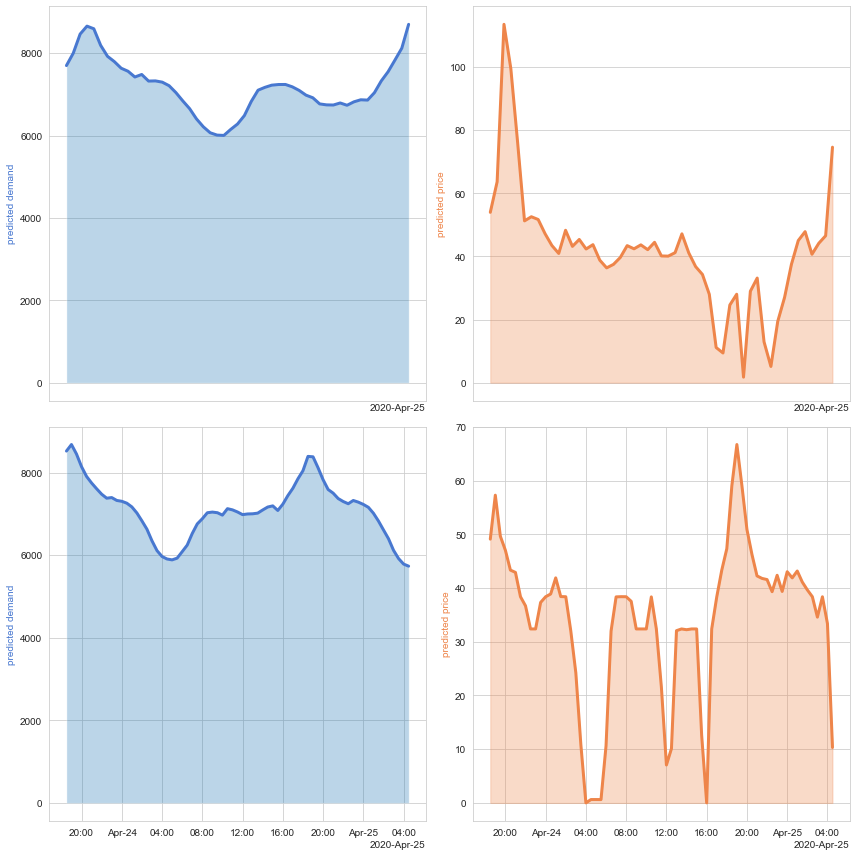

In [19]:
fig, ((dispatch_sum_ax, dispatch_price_ax), (predispatch_sum_ax, predispatch_price_ax)) = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

dispatch_x = dispatch_date_time
dispatch_region_sum_y = dispatch_region_sum[dispatch_region_sum.REGIONID == "NSW1"].CLEAREDSUPPLY.astype(float)
dispatch_region_price_y = dispatch_region_price[dispatch_region_price.REGIONID == "NSW1"].RRP.astype(float)


predispatch_x = predispatch_region_sum[predispatch_region_sum.REGIONID == "NSW1"].PERIODID.astype(int)
predispatch_x = predispatch_x.apply(convert_to_datetime)
predispatch_region_sum_y = predispatch_region_sum[predispatch_region_sum.REGIONID == "NSW1"].CLEAREDSUPPLY.astype(float)
predispatch_region_price_y =predispatch_region_price[predispatch_region_price.REGIONID == "NSW1"].RRP.astype(float)


dispatch_sum_ax.set_ylabel('predicted demand', color=blue)
dispatch_sum_ax.plot(dispatch_x, dispatch_region_sum_y, color = blue, lw = 3)
dispatch_sum_ax.fill_between(dispatch_x, 0, dispatch_region_sum_y, alpha=.3)
dispatch_sum_ax.xaxis.set_major_locator(locator)
dispatch_sum_ax.xaxis.set_major_formatter(formatter)

dispatch_price_ax.set_ylabel('predicted price', color=red)
dispatch_price_ax.plot(dispatch_x, dispatch_region_price_y, color = red, lw = 3)
dispatch_price_ax.fill_between(dispatch_x, 0, dispatch_region_price_y, alpha=.3, color=red)
dispatch_price_ax.xaxis.set_major_locator(locator)
dispatch_price_ax.xaxis.set_major_formatter(formatter)


predispatch_sum_ax.set_ylabel('predicted demand', color=blue)
predispatch_sum_ax.plot(predispatch_x, predispatch_region_sum_y, color = blue, lw = 3)
predispatch_sum_ax.fill_between(predispatch_x, 0, predispatch_region_sum_y, alpha=.3)
predispatch_sum_ax.xaxis.set_major_locator(locator)
predispatch_sum_ax.xaxis.set_major_formatter(formatter)

predispatch_price_ax.set_ylabel('predicted price', color=red)
predispatch_price_ax.plot(predispatch_x, predispatch_region_price_y, color = red, lw = 3)
predispatch_price_ax.fill_between(predispatch_x, 0, predispatch_region_price_y, alpha=.3, color=red)
predispatch_price_ax.xaxis.set_major_locator(locator)
predispatch_price_ax.xaxis.set_major_formatter(formatter)

fig.tight_layout()
plt.show()

51
4      49.11139
5      57.30027
12     49.65586
18     47.04558
21     43.35005
         ...   
321    38.39000
329    34.59164
334    38.38000
335    33.38015
343    10.31784
Name: RRP, Length: 69, dtype: float64


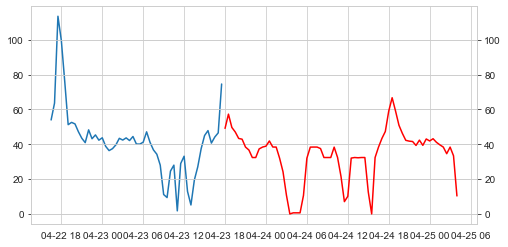

In [20]:
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig2, ax = plt.subplots(figsize=(8,4))
# x = dispatch_x.append(predispatch_x)
# 
# toNum = mdates.date2num(dispatch_x)
# toNum2 = mdates.date2num(predispatch_x)
# 
# segs = np.zeros(())
# 
# lines = [(toNum, dispatch_region_price_y.array), (mdates.date2num(predispatch_x), predispatch_region_price_y.array)]
# 
# print(lines)
# 
# lc = LineCollection(lines)
# 
# ax.add_collection(lc)
# 
# plt.show()
# 
# print(toNum)

additional = x.shape[0] - dispatch_region_price_y.shape[0]
y1 = dispatch_region_price_y.append(pd.Series([None] * additional))
additional = x.shape[0] - predispatch_region_price_y.shape[0]
print(additional)
print(predispatch_region_price_y)
y2 = pd.Series([None] * additional).append(predispatch_region_price_y)

ax.plot(x, y1)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax2 = ax.twinx()

ax.get_shared_y_axes().join(ax, ax2)

ax2.plot(x, y2, color="red")
